# Houzz Data Challenge

### Data Preprocessing

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('houzz_data_challenge_newsletters.csv')

In [16]:
data.head()

,ts,nl_id,user_id,dt,hr,event_type,event_type_param
0,1461110419,2853,4551,4/19/16,17,nlsent,0
1,1461715220,2885,4551,4/26/16,17,nlsent,0
2,1461456022,2873,4551,4/23/16,17,nlsent,0
3,1461110419,2853,6159,4/19/16,17,nlsent,0
4,1461715220,2885,6159,4/26/16,17,nlsent,0


In [17]:
data.isnull().sum()

ts                  0
nl_id               0
user_id             0
dt                  0
hr                  0
event_type          0
event_type_param    0
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164071 entries, 0 to 164070
Data columns (total 7 columns):
ts                  164071 non-null int64
nl_id               164071 non-null int64
user_id             164071 non-null int64
dt                  164071 non-null object
hr                  164071 non-null int64
event_type          164071 non-null object
event_type_param    164071 non-null object
dtypes: int64(4), object(3)
memory usage: 8.8+ MB


In [21]:
data.event_type_param.value_counts()

0      127176
pv2     32554
g0       1423
g1        817
g3        620
g2        530
g4        359
g7        226
g6        219
g5        147
Name: event_type_param, dtype: int64

In [22]:
data.dt.value_counts()

4/26/16    37287
4/30/16    36198
4/19/16    35307
4/23/16    35211
4/24/16     7142
4/27/16     5176
4/20/16     3722
4/25/16     1825
4/28/16     1036
4/21/16      514
4/29/16      427
4/22/16      226
Name: dt, dtype: int64

In [23]:
len(data.user_id.unique())

32507

In [4]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
print pysqldf("SELECT * FROM data LIMIT 5;")

           ts  nl_id  user_id       dt  hr event_type event_type_param
0  1461110419   2853     4551  4/19/16  17     nlsent                0
1  1461715220   2885     4551  4/26/16  17     nlsent                0
2  1461456022   2873     4551  4/23/16  17     nlsent                0
3  1461110419   2853     6159  4/19/16  17     nlsent                0
4  1461715220   2885     6159  4/26/16  17     nlsent                0


#### Have a baisic look at dataset

In [49]:
q = """
    SELECT
        nl_id,
        user_id,
        event_type
    FROM 
        data
    ORDER BY 
        nl_id ASC,
        user_id ASC,
        event_type DESC;
"""

data1 = pysqldf(q)

print data1.head(15)

    nl_id  user_id event_type
0    2853     4551     nlsent
1    2853     6159     nlsent
2    2853    19903     nlsent
3    2853    25495     nlsent
4    2853    25495       nlpv
5    2853    37157     nlsent
6    2853    48910     nlsent
7    2853    48910       nlpv
8    2853    51765     nlsent
9    2853    54209     nlsent
10   2853    54209       nlpv
11   2853    76822     nlsent
12   2853    79377     nlsent
13   2853    79752     nlsent
14   2853    80361     nlsent


#### We have 4 cases now: only sent; only view; sent+view; sent+click

#### Find out newsletter ID and user IDs where event type = sent and click, but no open

In [110]:
q = """
    SELECT 
        a.nl_id,
        a.user_id,
        a.dt,
        a.hr,
        a.event_type,
        b.event_type,
        a.event_type_param
    FROM 
        (select * from data where event_type = 'nlpv') a
    LEFT JOIN
        (select * from data where event_type = 'nlsent') b
            on a.nl_id=b.nl_id and a.user_id=b.user_id 
    WHERE
        b.nl_id IS NULL or
        b.user_id IS NULL;
    """

data11 = pysqldf(q)

print data11.head(20)

    nl_id   user_id       dt  hr event_type event_type event_type_param
0    2873    378136  4/26/16  11       nlpv       None              pv2
1    2853    469746  4/20/16  10       nlpv       None              pv2
2    2853    469746  4/20/16  10       nlpv       None              pv2
3    2873    469746  4/24/16  20       nlpv       None              pv2
4    2853    469746  4/19/16  19       nlpv       None              pv2
5    2885    469746  4/26/16  15       nlpv       None              pv2
6    2873    469746  4/24/16   6       nlpv       None              pv2
7    2853    469746  4/19/16  15       nlpv       None              pv2
8    2873    469746  4/23/16  15       nlpv       None              pv2
9    2885    469746  4/26/16  19       nlpv       None              pv2
10   2873   8546143  4/26/16  11       nlpv       None              pv2
11   2885  25098452  4/28/16   1       nlpv       None              pv2
12   2853  25098452  4/20/16   9       nlpv       None          

#### Find out newsletter ID and user IDs where event type = viewed ONLY

In [111]:
q = """
    SELECT 
        a.nl_id,
        a.user_id,
        a.dt,
        a.hr,
        a.event_type,
        b.event_type,
        a.event_type_param
    FROM 
        (select * from data where event_type = 'nllc') a
    LEFT JOIN
        (select * from data where event_type = 'nlpv') b
            on a.nl_id=b.nl_id and a.user_id=b.user_id 
    WHERE
        b.nl_id IS NULL or
        b.user_id IS NULL;
    """

data1 = pysqldf(q)

print data1.head(10)

   nl_id   user_id       dt  hr event_type event_type event_type_param
0   2873    103862  4/23/16  21       nllc       None               g1
1   2873   3455061  4/24/16   6       nllc       None               g1
2   2912   4207545  4/30/16  21       nllc       None               g0
3   2885   7743612  4/26/16  20       nllc       None               g2
4   2885   8744303  4/26/16  19       nllc       None               g0
5   2885   8744303  4/26/16  19       nllc       None               g0
6   2912   9003529  4/30/16  21       nllc       None               g0
7   2885  16342075  4/26/16  19       nllc       None               g1
8   2885  16342075  4/26/16  19       nllc       None               g2
9   2873  16342075  4/23/16  19       nllc       None               g2


In [112]:
data1.shape

(179, 7)

In [113]:
data11.shape

(18, 7)

In [114]:
data.shape

(164071, 7)

#### Delete newsletter ID and user IDs where event type = sent and click, but no open

In [124]:
q = """
    select
        a.ts,
        a.nl_id,
        a.user_id,
        a.dt,
        a.hr,
        a.event_type,
        a.event_type_param
    from 
        data a 
    left join
        data11 b
        on a.user_id=b.user_id and a.nl_id=b.nl_id
    where 
        b.user_id is null or
        b.nl_id is null
    """

data2 = pysqldf(q)

print data2.head()

           ts  nl_id  user_id       dt  hr event_type event_type_param
0  1461110419   2853     4551  4/19/16  17     nlsent                0
1  1461715220   2885     4551  4/26/16  17     nlsent                0
2  1461456022   2873     4551  4/23/16  17     nlsent                0
3  1461110419   2853     6159  4/19/16  17     nlsent                0
4  1461715220   2885     6159  4/26/16  17     nlsent                0


#### Delete newsletter ID and user IDs where event type = viewed ONLY

In [126]:
q = """
    select
        a.ts,
        a.nl_id,
        a.user_id,
        a.dt,
        a.hr,
        a.event_type,
        a.event_type_param
    from 
        data a 
    left join
        data1 b
        on a.user_id=b.user_id and a.nl_id=b.nl_id
    where 
        b.user_id is null or
        b.nl_id is null
    """

data2 = pysqldf(q)

print data2.head()

           ts  nl_id  user_id       dt  hr event_type event_type_param
0  1461110419   2853     4551  4/19/16  17     nlsent                0
1  1461715220   2885     4551  4/26/16  17     nlsent                0
2  1461456022   2873     4551  4/23/16  17     nlsent                0
3  1461110419   2853     6159  4/19/16  17     nlsent                0
4  1461715220   2885     6159  4/26/16  17     nlsent                0


In [127]:
data2.shape

(163771, 7)

### 1.	How many newsletters were sent vs. opened for nl_id 2885 and 2912? What’s the overall open rate for each newsletter?
 

#### After filetering out the table, we only have two cases now: only sent & sent+view

In [59]:
data2.head()

,ts,nl_id,user_id,dt,hr,event_type,event_type_param
0,1461110419,2853,4551,4/19/16,17,nlsent,0
1,1461715220,2885,4551,4/26/16,17,nlsent,0
2,1461456022,2873,4551,4/23/16,17,nlsent,0
3,1461110419,2853,6159,4/19/16,17,nlsent,0
4,1461715220,2885,6159,4/26/16,17,nlsent,0


#### Overall open rate for each newsletter

In [60]:
q = '''
    select
        nl_id,
        count(distinct(case when event_type='nlsent' then user_id end)) as received,
        count(distinct(case when event_type='nlpv' then user_id end)) as open
    from 
        data2
    group by
        nl_id;
    '''

data0 = pysqldf(q)

print data0.head()

   nl_id  received  open
0   2853     31401  6171
1   2873     31610  6532
2   2885     31866  5940
3   2912     32178  2228


In [137]:
data0['open_rate'] = data0.open / data0.received 

In [143]:
for i in range(len(data0)):
    print ('The open rate for newsletter {0} is: {1:.2%}'.format(data0.loc[i].nl_id,data0.loc[i].open_rate))

The open rate for newsletter 2853.0 is: 19.65%
The open rate for newsletter 2873.0 is: 20.66%
The open rate for newsletter 2885.0 is: 18.64%
The open rate for newsletter 2912.0 is: 6.92%


<br>

### 2. What % of users opened the email within 1, 2, 3, 4, 5, 6, 7 days? Visualize the results for each newsletter. Which newsletter has the best open_rate?


In [145]:
data2.to_csv('data2.csv',sep=',',index=False)

In [58]:
data2 = pd.read_csv('data2.csv')

In [6]:
data2.head()

,ts,nl_id,user_id,dt,hr,event_type,event_type_param
0,1461110419,2853,4551,4/19/16,17,nlsent,0
1,1461715220,2885,4551,4/26/16,17,nlsent,0
2,1461456022,2873,4551,4/23/16,17,nlsent,0
3,1461110419,2853,6159,4/19/16,17,nlsent,0
4,1461715220,2885,6159,4/26/16,17,nlsent,0


In [7]:
from datetime import datetime

In [8]:
q = '''
    select
        *
    from 
        data2
    order by
        nl_id ASC,
        user_id ASC,
        event_type DESC;
    '''

data2 = pysqldf(q)

In [9]:
data2['date'] = data2['dt']+ '/' + data2['hr'].astype(str)

In [10]:
data2['date'] = pd.to_datetime(data2['date'],format='%m/%d/%y/%H')

In [11]:
data2.head(10)

,ts,nl_id,user_id,dt,hr,event_type,event_type_param,date
0,1461110419,2853,4551,4/19/16,17,nlsent,0,2016-04-19 17:00:00
1,1461110419,2853,6159,4/19/16,17,nlsent,0,2016-04-19 17:00:00
2,1461110419,2853,19903,4/19/16,17,nlsent,0,2016-04-19 17:00:00
3,1461110419,2853,25495,4/19/16,17,nlsent,0,2016-04-19 17:00:00
4,1461158990,2853,25495,4/20/16,6,nlpv,pv2,2016-04-20 06:00:00
5,1461110419,2853,37157,4/19/16,17,nlsent,0,2016-04-19 17:00:00
6,1461110419,2853,48910,4/19/16,17,nlsent,0,2016-04-19 17:00:00
7,1461122311,2853,48910,4/19/16,20,nlpv,pv2,2016-04-19 20:00:00
8,1461110419,2853,51765,4/19/16,17,nlsent,0,2016-04-19 17:00:00
9,1461110419,2853,54209,4/19/16,17,nlsent,0,2016-04-19 17:00:00


In [12]:
(data2.date[4]-data2.date[3]).days

0

In [13]:
q = """
    select
        a.ts,
        a.nl_id,
        a.user_id,
        a.dt,
        a.hr,
        a.event_type,
        a.event_type_param,
        a.date
    from 
        data2 a 
    inner join
        (select * from data2 where event_type='nlpv') b
        on a.user_id=b.user_id and a.nl_id=b.nl_id;
    """

data20 = pysqldf(q)

In [14]:
data20.head()

,ts,nl_id,user_id,dt,hr,event_type,event_type_param,date
0,1461110419,2853,25495,4/19/16,17,nlsent,0,2016-04-19 17:00:00.000000
1,1461158990,2853,25495,4/20/16,6,nlpv,pv2,2016-04-20 06:00:00.000000
2,1461110419,2853,48910,4/19/16,17,nlsent,0,2016-04-19 17:00:00.000000
3,1461122311,2853,48910,4/19/16,20,nlpv,pv2,2016-04-19 20:00:00.000000
4,1461110419,2853,54209,4/19/16,17,nlsent,0,2016-04-19 17:00:00.000000


In [15]:
q = """
    select
        a.nl_id,
        a.user_id,
        a.date as sent_date,
        b.date as open_date
    from 
        (select * from data20 where event_type='nlsent') a 
    inner join
        (select * from data20 where event_type='nlpv') b
        on a.user_id=b.user_id and a.nl_id=b.nl_id;
    """

data21 = pysqldf(q)

In [16]:
data21.head(10)

,nl_id,user_id,sent_date,open_date
0,2853,25495,2016-04-19 17:00:00.000000,2016-04-20 06:00:00.000000
1,2853,48910,2016-04-19 17:00:00.000000,2016-04-19 20:00:00.000000
2,2853,54209,2016-04-19 17:00:00.000000,2016-04-20 04:00:00.000000
3,2853,95523,2016-04-19 17:00:00.000000,2016-04-23 05:00:00.000000
4,2853,134717,2016-04-19 17:00:00.000000,2016-04-21 10:00:00.000000
5,2853,164153,2016-04-19 17:00:00.000000,2016-04-19 22:00:00.000000
6,2853,170574,2016-04-19 17:00:00.000000,2016-04-19 22:00:00.000000
7,2853,173760,2016-04-19 17:00:00.000000,2016-04-19 19:00:00.000000
8,2853,177556,2016-04-19 17:00:00.000000,2016-04-19 23:00:00.000000
9,2853,208302,2016-04-19 17:00:00.000000,2016-04-20 13:00:00.000000


#### Pandasql can't do basic math calculation, this is annoying

In [17]:
q = '''
    select
        nl_id,
        user_id,
        sent_date,
        min(open_date) as open_date
    from 
        data21
    group by
        nl_id,
        user_id
    '''

data22 = pysqldf(q)

In [28]:
data22.head()

,nl_id,user_id,sent_date,open_date,days
0,2853,25495,2016-04-19 17:00:00,2016-04-20 06:00:00,0
1,2853,48910,2016-04-19 17:00:00,2016-04-19 20:00:00,0
2,2853,54209,2016-04-19 17:00:00,2016-04-20 04:00:00,0
3,2853,95523,2016-04-19 17:00:00,2016-04-23 05:00:00,3
4,2853,134717,2016-04-19 17:00:00,2016-04-21 10:00:00,1


In [19]:
data22['open_date'] = pd.to_datetime(data22['open_date'])
data22['sent_date'] = pd.to_datetime(data22['sent_date'])

In [20]:
data22.to_csv('data22.csv',sep=',',index=False)

In [24]:
data22['days'] = (data22['open_date']- data22['sent_date']).dt.days

In [39]:
data22.head(10)

,nl_id,user_id,sent_date,open_date,days
0,2853,25495,2016-04-19 17:00:00,2016-04-20 06:00:00,0
1,2853,48910,2016-04-19 17:00:00,2016-04-19 20:00:00,0
2,2853,54209,2016-04-19 17:00:00,2016-04-20 04:00:00,0
3,2853,95523,2016-04-19 17:00:00,2016-04-23 05:00:00,3
4,2853,134717,2016-04-19 17:00:00,2016-04-21 10:00:00,1
5,2853,164153,2016-04-19 17:00:00,2016-04-19 22:00:00,0
6,2853,170574,2016-04-19 17:00:00,2016-04-19 22:00:00,0
7,2853,173760,2016-04-19 17:00:00,2016-04-19 19:00:00,0
8,2853,177556,2016-04-19 17:00:00,2016-04-19 23:00:00,0
9,2853,208302,2016-04-19 17:00:00,2016-04-20 13:00:00,0


In [56]:
q = '''
    select 
        nl_id,
        days,
        count()
    from 
        data22
    group by
        nl_id,
        days
    '''

data23 = pysqldf(q)

In [74]:
data23[24:40]

,nl_id,days,count()
24,2885,0,5352
25,2885,1,389
26,2885,2,126
27,2885,3,63
28,2885,4,6
29,2912,-1,1
30,2912,0,2227


In [61]:
data0.head()

,nl_id,received,open
0,2853,31401,6171
1,2873,31610,6532
2,2885,31866,5940
3,2912,32178,2228


In [68]:
# Newsletter = 2853
a = data23['count()'][1:8] / data0.open[0]
a

1    0.862097
2    0.058661
3    0.019770
4    0.013936
5    0.014584
6    0.011343
7    0.007940
Name: count(), dtype: float64

In [73]:
# Newsletter = 2873
b = data23['count()'][15:22] / data0.open[1]

b

15    0.785517
16    0.144825
17    0.035364
18    0.015462
19    0.007961
20    0.005818
21    0.003827
Name: count(), dtype: float64

In [75]:
# Newsletter = 2885
c = data23['count()'][24:29] / data0.open[2]

c

24    0.901010
25    0.065488
26    0.021212
27    0.010606
28    0.001010
Name: count(), dtype: float64

In [86]:
# Newsletter = 2912
from __future__ import division
d = data23['count()'][30] / data0.open[3]
d

0.99955116696588864

### Visualization

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

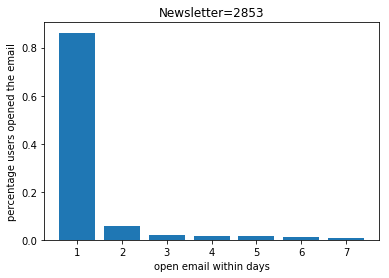

In [111]:
fig, ax = plt.subplots()
x=[1,2,3,4,5,6,7]
ax.bar(x,a)
ax.set_xlabel('open email within days')
ax.set_ylabel('percentage users opened the email')
ax.set_title('Newsletter=2853')

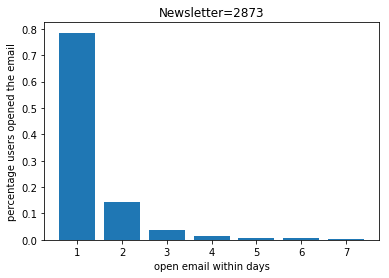

In [110]:
fig, ax = plt.subplots()
x=[1,2,3,4,5,6,7]
ax.bar(x,b)
ax.set_xlabel('open email within days')
ax.set_ylabel('percentage users opened the email')
ax.set_title('Newsletter=2873')

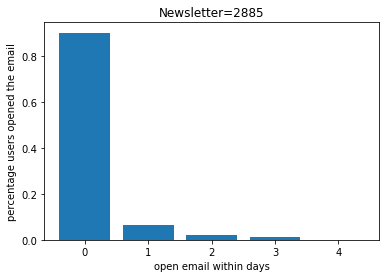

In [108]:
fig, ax = plt.subplots()
x=[1,2,3,4,5]
ax.bar(x,c)
ax.set_xlabel('open email within days')
ax.set_ylabel('percentage users opened the email')
ax.set_title('Newsletter=2885')

In [133]:
import numpy as np
d = np.append(d,0)

(0, 1.2)

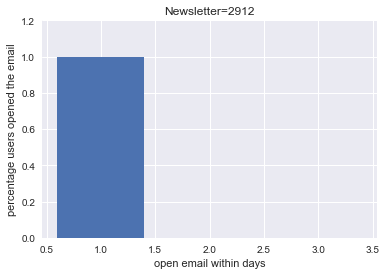

In [145]:
fig, ax = plt.subplots(figsize=(6,4))
x=(1,2,3)
ax.bar(x,d)
ax.set_xlabel('open email within days')
ax.set_ylabel('percentage users opened the email')
ax.set_title('Newsletter=2912')
ax.set_ylim(0,1.2)


<br>

### 3. Make a graph of the CTRs by link position for nl_id 2873 and 2885. Visualize the results for each newsletter.


In [146]:
data2 = pd.read_csv('data2.csv')

In [147]:
data2.head()

,ts,nl_id,user_id,dt,hr,event_type,event_type_param
0,1461110419,2853,4551,4/19/16,17,nlsent,0
1,1461715220,2885,4551,4/26/16,17,nlsent,0
2,1461456022,2873,4551,4/23/16,17,nlsent,0
3,1461110419,2853,6159,4/19/16,17,nlsent,0
4,1461715220,2885,6159,4/26/16,17,nlsent,0


In [151]:
q = '''
    select 
        nl_id,
        count(user_id) as opens
    from 
        data2
    where 
        event_type='nlpv'
    group by 
        nl_id
    '''

data30 = pysqldf(q)

print data30

   nl_id  opens
0   2853   9019
1   2873  11034
2   2885   9401
3   2912   3100


In [178]:
q = '''
    select
        nl_id,
        event_type_param,
        count(event_type_param) as clicks
    from 
        data2
    group by
        nl_id,
        event_type_param
    '''
data31 = pysqldf(q)
print data31[12:]

    nl_id event_type_param  clicks
12   2873              pv2   11034
13   2885                0   31866
14   2885               g0     304
15   2885               g1     278
16   2885               g2     269
17   2885               g3     166
18   2885               g4     200
19   2885               g5      52
20   2885               g6      74
21   2885               g7      86
22   2885              pv2    9401
23   2912                0   32178
24   2912               g0     124
25   2912               g1     271
26   2912               g2      60
27   2912               g3      91
28   2912               g4      16
29   2912               g5      38
30   2912               g6      29
31   2912               g7      56
32   2912              pv2    3100


#### For newsletter=2853 there is only click where is on 7th sale banner.

#### For newsletter=2873

In [155]:
b = data31.clicks[4:12] / data30.opens[1]

In [158]:
b

4     0.083016
5     0.021388
6     0.016585
7     0.030814
8     0.011872
9     0.004713
10    0.010060
11    0.007069
Name: clicks, dtype: float64

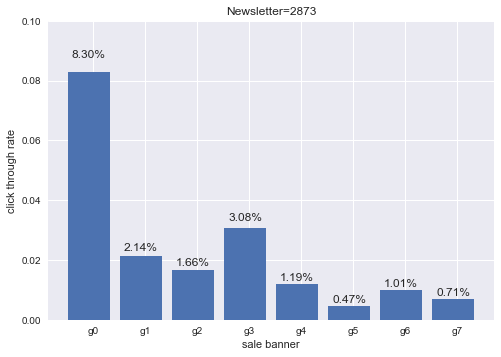

In [192]:
fig, ax = plt.subplots()
x=np.arange(8)
width=0.35
rects1 = ax.bar(x,b)
ax.set_xlabel('sale banner')
ax.set_ylabel('click through rate')
ax.set_ylim(0,0.1)
ax.set_title('Newsletter=2873')
ax.set_xticks(x+width/2-0.1)
ax.set_xticklabels(('g0','g1','g2','g3','g4','g5','g6','g7'))
#annotate
def autolabel(rects):
    for rect in rects:
        height=rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2, 1.05*height, '{:.2%}'.format(height), ha='center', va='bottom')
autolabel(rects1)

#### For newsletter=2885

In [179]:
c = data31.clicks[14:22] / data30.opens[2]
c

14    0.032337
15    0.029571
16    0.028614
17    0.017658
18    0.021274
19    0.005531
20    0.007872
21    0.009148
Name: clicks, dtype: float64

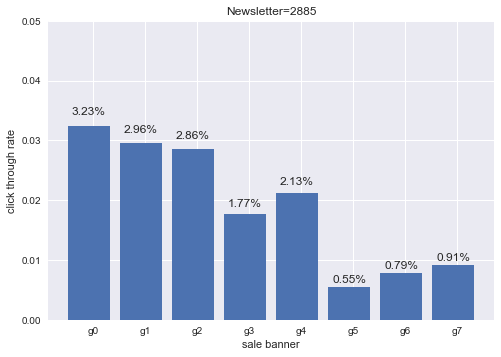

In [191]:
fig, ax = plt.subplots()
x=np.arange(8)
width=0.35
rects2 = ax.bar(x,c)
ax.set_xlabel('sale banner')
ax.set_ylabel('click through rate')
ax.set_ylim(0,0.05)
ax.set_title('Newsletter=2885')
ax.set_xticks(x+width/2-0.1)
ax.set_xticklabels(('g0','g1','g2','g3','g4','g5','g6','g7'))
autolabel(rects2)

#### For newsletter=2912

In [183]:
d = data31.clicks[24:32] / data30.opens[3]
d

24    0.040000
25    0.087419
26    0.019355
27    0.029355
28    0.005161
29    0.012258
30    0.009355
31    0.018065
Name: clicks, dtype: float64

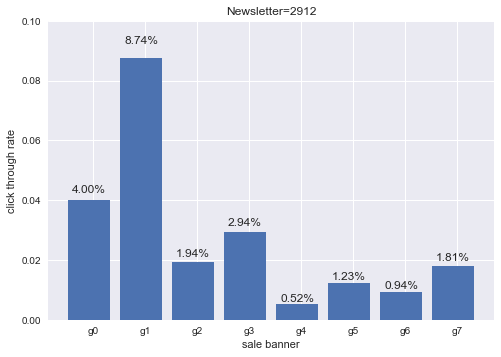

In [190]:
fig, ax = plt.subplots()
x=np.arange(8)
width=0.35
rects3 = ax.bar(x,d)
ax.set_xlabel('sale banner')
ax.set_ylabel('click through rate')
ax.set_ylim(0,0.10)
ax.set_title('Newsletter=2912')
ax.set_xticks(x+width/2-0.1)
ax.set_xticklabels(('g0','g1','g2','g3','g4','g5','g6','g7'))
autolabel(rects3)

### 4.	What other metrics we can use to measure newsletter performance/quality? For each metric please state why it is important in one sentence.


**Conversion Rate:** Percentage of people who click the banner ad and buy the product.   
**Perecentage Delievered:** We may send to the wrong address or ISP may block us.  
**Percentage Unsubsciribed:** If we sent 5 emails to a customer everyday, he may get agitated and unsubscribe from you.  
**List of Fatigue:** Are we sendig too many eamils to the same person over the course like two months?   
**Percentage Forwarded:** In digital marketing, it's about reach. Maybe a coupon I can't use and I give it to my friends who want to buy sth.